# MiniRun5 LRS output tutorial

In [167]:
!git clone https://github.com/peter-madigan/h5flow
!pip install ./h5flow

fatal: destination path 'h5flow' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable
Processing ./h5flow
  Preparing metadata (setup.py) ... done
  Created wheel for h5flow: filename=h5flow-0.2.4-py3-none-any.whl size=31485 sha256=e0013a4697eccdae698a7ab2987d28b9c6d48f487faaf1fb07b637ae6aa2eb58
  Stored in directory: /tmp/pip-ephem-wheel-cache-rf0o0t24/wheels/78/40/8f/a6f2e21bab3d5347e6d488f340630384587818f7909ea71496
Successfully built h5flow
  Attempting uninstall: h5flow
    Found existing installation: h5flow 0.2.4
    Uninstalling h5flow-0.2.4:
      Successfully uninstalled h5flow-0.2.4


In [168]:
!git clone https://github.com/DUNE/ndlar_flow
!pip install ./ndlar_flow

fatal: destination path 'ndlar_flow' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable
Processing ./ndlar_flow
  Preparing metadata (setup.py) ... done
  Created wheel for module0_flow: filename=module0_flow-1.0.1-py3-none-any.whl size=236688 sha256=dad8a690e5a47e8a9edd119a0c997889302a3ca6fdae7bef57a189924667aedd
  Stored in directory: /tmp/pip-ephem-wheel-cache-owynddu6/wheels/2a/b6/90/58636d7b30e182dda1a93900fca7b8f6a380a9e55c6aa02f76
Successfully built module0_flow
  Attempting uninstall: module0_flow
    Found existing installation: module0_flow 1.0.1
    Uninstalling module0_flow-1.0.1:
      Successfully uninstalled module0_flow-1.0.1


In [207]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import matplotlib as mlp
import itertools
from h5flow.data import dereference
#import h5flow
import pylab as pl
from proto_nd_flow.util.lut import LUT
from matplotlib import cm, colors
import matplotlib.patches as mpatches

In [208]:
def h5_tree(val, pre='',skip_ref=False):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                if key=="ref" and skip_ref:
                    continue
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))

## Import ndlar_flow file

In [209]:
f = h5py.File("MiniRun5_1E19_RHC.convert2h5.01023.EDEPSIM.proto_nd_flow.h5")
h5_tree(f,skip_ref=True)

├── charge
│   ├── calib_final_hits
│   │   ├── data (73395)
│   │   └── ref
│   │       ├── charge
│   │       │   ├── calib_prompt_hits
│   │       │   │   └── ref_region (73395)
│   │       │   ├── events
│   │       │   │   └── ref_region (73395)
│   │       │   └── raw_events
│   │       │       └── ref_region (73395)
│   │       └── mc_truth
│   │           └── calib_final_hit_backtrack
│   │               ├── ref (73395)
│   │               └── ref_region (73395)
│   ├── calib_prompt_hits
│   │   ├── data (109097)
│   │   └── ref
│   │       ├── charge
│   │       │   ├── calib_final_hits
│   │       │   │   ├── ref (109097)
│   │       │   │   └── ref_region (109097)
│   │       │   ├── events
│   │       │   │   └── ref_region (109097)
│   │       │   ├── packets
│   │       │   │   ├── ref (109097)
│   │       │   │   └── ref_region (109097)
│   │       │   └── raw_events
│   │       │       └── ref_region (109097)
│   │       └── mc_truth
│   │           └── calib_prompt_hit

In [210]:
h5_tree(f["light"])

├── events
│   ├── data (198)
│   └── ref
│       ├── charge
│       │   ├── events
│       │   │   └── ref_region (198)
│       │   └── ext_trigs
│       │       └── ref_region (198)
│       └── light
│           ├── sipm_hits
│           │   ├── ref (3167)
│           │   └── ref_region (198)
│           ├── sum_hits
│           │   ├── ref (1815)
│           │   └── ref_region (198)
│           ├── t_ns
│           │   ├── ref (198)
│           │   └── ref_region (198)
│           └── wvfm
│               ├── ref (198)
│               └── ref_region (198)
├── sipm_hits
│   ├── data (3167)
│   └── ref
│       └── light
│           └── events
│               └── ref_region (3167)
├── sum_hits
│   ├── data (1815)
│   └── ref
│       └── light
│           └── events
│               └── ref_region (1815)
├── t_ns
│   ├── data (198)
│   └── ref
│       └── light
│           └── events
│               └── ref_region (198)
└── wvfm
    ├── data (198)
    └── ref
        └── light
          

In [211]:
h5_tree(f["geometry_info"])

├── anode_drift_coordinate
│   └── data (257)
├── det_bounds
│   └── data (129)
├── det_id
│   └── data (481)
├── det_rel_pos
│   └── data (129)
├── drift_dir
│   └── data (257)
├── pixel_coordinates_2D
│   └── data (1638401)
├── sipm_abs_pos
│   └── data (481)
├── sipm_rel_pos
│   └── data (481)
└── tile_id
    └── data (4097)


In [212]:
f["geometry_info/sipm_abs_pos/data"].shape

(481,)

## The More Basic Structure Check:

In [213]:
my_func = lambda name,dset : print(name) if isinstance(dset, h5py.Dataset) \
    else None
f.visititems(my_func)

charge/calib_final_hits/data
charge/calib_final_hits/ref/charge/calib_prompt_hits/ref_region
charge/calib_final_hits/ref/charge/events/ref_region
charge/calib_final_hits/ref/charge/raw_events/ref_region
charge/calib_final_hits/ref/mc_truth/calib_final_hit_backtrack/ref
charge/calib_final_hits/ref/mc_truth/calib_final_hit_backtrack/ref_region
charge/calib_prompt_hits/data
charge/calib_prompt_hits/ref/charge/calib_final_hits/ref
charge/calib_prompt_hits/ref/charge/calib_final_hits/ref_region
charge/calib_prompt_hits/ref/charge/events/ref_region
charge/calib_prompt_hits/ref/charge/packets/ref
charge/calib_prompt_hits/ref/charge/packets/ref_region
charge/calib_prompt_hits/ref/charge/raw_events/ref_region
charge/calib_prompt_hits/ref/mc_truth/calib_prompt_hit_backtrack/ref
charge/calib_prompt_hits/ref/mc_truth/calib_prompt_hit_backtrack/ref_region
charge/events/data
charge/events/ref/charge/calib_final_hits/ref
charge/events/ref/charge/calib_final_hits/ref_region
charge/events/ref/charge/ca

### When Referencing: 

There are two types of reference branch: 
1. a.../ref/b.../ref_region
2. a.../ref/b.../ref

Typically, you use both to reference (unless you use the h5flow dereference function)  
Suppose you want to find the calib_final_hits associated with a given event ID.    
charge/event/data and charge/calib_final_hits/data are different sizes! 

How do we start with charge/events/data and end with an appropriate index cut for calib_final_hits?

In [214]:
ev_id = 0
event = f['charge/events/data'][ev_id]

First, we use a.../ref/b.../ref_region.   
a.../ref/b.../ref_region is an array of arrays like [[0 2][3 7]...]   
It has as many entries as a..., such that its shape is: [len(a...), 2] with keys ['start', 'stop']    
'start' is the first index in b... asociated with the ev_id.    
'stop' is the last index in b... assiciated with ev_id   
b... should be the branch you want to perform a cut on.

In [215]:
href_start = f['charge/events/ref/charge/calib_final_hits/ref_region'][ev_id,'start']
href_stop = f['charge/events/ref/charge/calib_final_hits/ref_region'][ev_id,'stop']

Here we apply the cut to  a.../ref/b.../ref.    
This outputs an array with [ev_id, b... index] for every b... indice linked to ev_id.

In [216]:
hit_ref = f['charge/events/ref/charge/calib_final_hits/ref'][href_start:href_stop]

Cuts need to be a sequential array, so we make sure there's only one ev_id, and the indices are ordered.   
Then, we apply the cut. 

In [217]:
hit_ref = np.sort(hit_ref[hit_ref[:,0] == ev_id, 1])
hits_trk = f['charge/calib_final_hits/data'][hit_ref]
print(f['charge/calib_final_hits/data'].dtype.names)

('id', 'x', 'y', 'z', 't_drift', 'ts_pps', 'io_group', 'io_channel', 'Q', 'E')


If we format this as a function:

In [218]:
def one_to_many(event_id, h5file, one_entry_field, many_entry_field):
    print(one_entry_field+'/data')
    one_index = h5file[one_entry_field+'/data'][event_id]
    print(one_entry_field+'/ref/'+many_entry_field+'/ref_region')
    href_start = h5file[one_entry_field+'/ref/'+many_entry_field+'/ref_region'][event_id, 'start']
    href_stop = h5file[one_entry_field+'/ref/'+many_entry_field+'/ref_region'][event_id, 'stop']
    h_ref = h5file[one_entry_field+'/ref/'+many_entry_field+'/ref'][href_start:href_stop]
    h_ref = np.sort(h_ref[h_ref[:,0] == event_id, 1])
    print(many_entry_field+'/data')
    h_trk = h5file[many_entry_field+'/data'][h_ref]
    
    return h_trk

Let's try it in a plot:

In [219]:
def ndflow_charge_plot(event_id, h5file, one_entry_field, many_entry_field):
    
    hits_trk = one_to_many(event_id, h5file, one_entry_field, many_entry_field)
    
    x_pos = hits_trk['x'] # [cm], drift direction
    io_groups = hits_trk['io_group']
    y_pos = hits_trk['y']
    z_pos = hits_trk['z'] 
    
    fig,ax = plt.subplots(1,1,sharey=True, tight_layout=True, figsize=(13, 7))
    tpc_rectL = plt.Rectangle((-64.5,-65), 64, 130, linewidth=0.75, edgecolor='b', facecolor=cmap(0),zorder=-1)
    tpc_rectR = plt.Rectangle((0.5,-65), 64, 130, linewidth=0.75, edgecolor='b', facecolor=cmap(0),zorder=-1)

    ax.add_patch(tpc_rectR)
    ax.add_patch(tpc_rectL)
    
    ax.scatter(z_pos[io_groups==3],y_pos[io_groups==3],c='aqua',alpha=1,lw=1.5,s=8)
    ax.scatter(z_pos[io_groups==1],y_pos[io_groups==1],c='aqua',alpha=1,lw=1.5,s=8)
    ax.scatter(z_pos[io_groups==4],y_pos[io_groups==4],c='lightgreen',alpha=1,lw=1.5,s=8) 
    ax.scatter(z_pos[io_groups==2],y_pos[io_groups==2],c='lightgreen',alpha=1,lw=1.5,s=8)  
    ax.scatter(z_pos[io_groups==7],y_pos[io_groups==7],c='yellow',alpha=1,lw=1.5,s=8)
    ax.scatter(z_pos[io_groups==5],y_pos[io_groups==5],c='yellow',alpha=1,lw=1.5,s=8)
    ax.scatter(z_pos[io_groups==8],y_pos[io_groups==8],c='orangered',alpha=1,lw=1.5,s=8)                       
    ax.scatter(z_pos[io_groups==6],y_pos[io_groups==6],c='orangered',alpha=1,lw=1.5,s=8)
            
    ax.set_aspect("equal")
    ax.set_title('All Tracks')

    ax.set_xlabel("z [cm]")
    ax.set_ylabel("y [cm]")
    b_patch = mpatches.Patch(color='aqua', label='io_groups: 1,3')
    g_patch = mpatches.Patch(color='lightgreen', label='io_groups: 2,4')
    y_patch = mpatches.Patch(color='yellow', label='io_groups: 5,7')
    o_patch = mpatches.Patch(color='orangered', label='io_groups: 6,8')
    ax.legend(handles=[b_patch, g_patch,y_patch,o_patch],
          loc='lower left',ncol = 4, bbox_to_anchor=(-0.11,-0.2))
    plt.show()

charge/events/data
charge/events/ref/charge/calib_final_hits/ref_region
charge/calib_final_hits/data


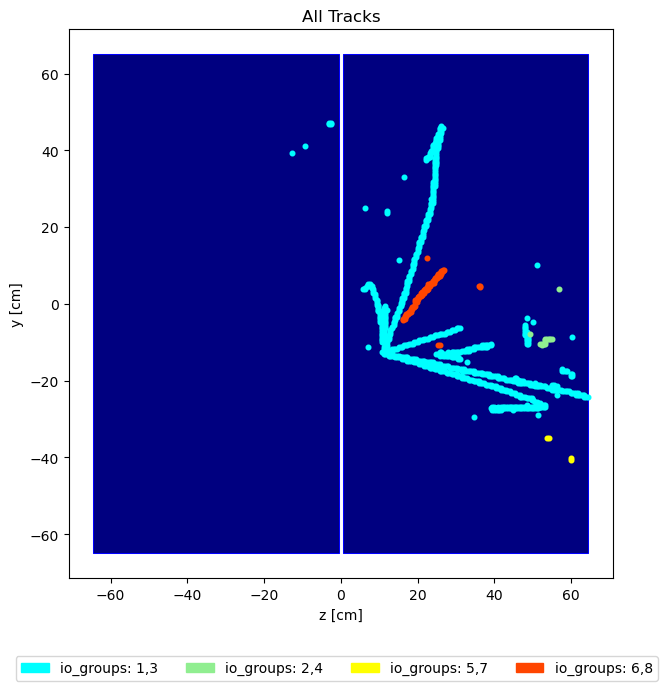

In [220]:
cmap = cm.jet
ndflow_charge_plot(5, f, 'charge/events', 'charge/calib_final_hits')

Now with light:

Note, for event 5, we're mainly in io_group 1.

In [221]:
light_evts = one_to_many(5, f, 'charge/events', 'light/events')
print('Light/events keys:',light_evts.dtype.names)
light_wvfms = one_to_many(light_evts['id'][0], f, 'light/events', 'light/wvfm')
print('Light/wvfms key:', light_wvfms.dtype.names)
print('samples shape:', np.shape(light_wvfms['samples']))

charge/events/data
charge/events/ref/light/events/ref_region
light/events/data
Light/events keys: ('id', 'event', 'sn', 'utime_ms', 'tai_ns', 'wvfm_valid')
light/events/data
light/events/ref/light/wvfm/ref_region
light/wvfm/data
Light/wvfms key: ('samples',)
samples shape: (1, 8, 64, 1000)


### A note on geometry:

Every ADC has 64 available channels.   
Per ADC, the 2x2 light LRS uses 48 of those 64 channels to collect light waveforms.   
We can use f['light/events/data']['wvfm_valid'] to select for this. 

In [222]:
valid_wvfm = light_evts['wvfm_valid']
print('Valid Waveform Shape:',np.shape(valid_wvfm))
wvfms_0 = light_wvfms['samples'][0,0,:][valid_wvfm[0,0,:]==1]
print('New Light Waveform Shape:',np.shape(wvfms_0))

Valid Waveform Shape: (1, 8, 64)
New Light Waveform Shape: (48, 1000)


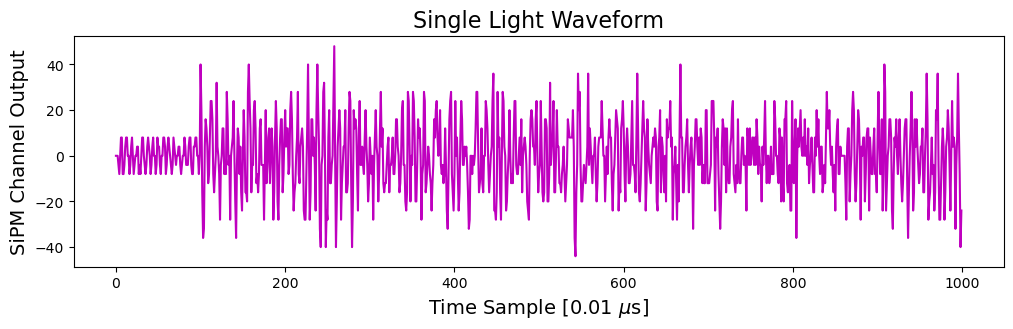

In [223]:
SAMPLES = 1000
fig = plt.figure(figsize=(12,3))
plt.plot(np.linspace(0,SAMPLES-1,SAMPLES),wvfms_0[5,:], 'm-')
plt.title('Single Light Waveform', fontsize=16)
plt.xlabel(r'Time Sample [0.01 $\mu$s]', fontsize=14)
plt.ylabel('SiPM Channel Output', fontsize=14)
#plt.legend(fontsize=14)
plt.show()

### Import geometry info

Realised yesterday that "geometry_info" in the current form is not useful. So here for the moment a bush fix...

In [224]:
sipm_abs_pos_dtype_meta = np.dtype([('min_max_keys', 'i8', (2, 2)),('default', 'f4', (3,))])
sipm_abs_pos_meta_arr = np.zeros((1,), dtype=sipm_abs_pos_dtype_meta)
sipm_abs_pos_meta_arr['min_max_keys'] = ((0,7),(4,63))
sipm_abs_pos_meta_arr['default'] = -1
sipm_abs_pos = LUT.from_array(sipm_abs_pos_meta_arr,f["geometry_info/sipm_abs_pos/data"])

# sipm_abs_pos[(adc,chan)] = [x,y,z] in cm

In [225]:
sipm_rel_pos_dtype_meta = np.dtype([('min_max_keys', 'i8', (2, 2)),('default', 'i4', (3,))])
sipm_rel_pos_meta_arr = np.zeros((1,), dtype=sipm_rel_pos_dtype_meta)
sipm_rel_pos_meta_arr['min_max_keys'] = ((0,7),(4,63))
sipm_rel_pos_meta_arr['default'] = -1
sipm_rel_pos = LUT.from_array(sipm_rel_pos_meta_arr,f["geometry_info/sipm_rel_pos/data"])

# sipm_rel_pos[(adc,chan)] = [tpc, side, vertical position]
# side: 0->left 1->right looking in drift direction
# vertical position: index starting from bottom (0-23)

In [226]:
det_bounds_dtype_meta = np.dtype([('min_max_keys', 'i8', (2, 2)),('default', 'f4', (2,3))])
det_bounds_meta_arr = np.zeros((1,), dtype=det_bounds_dtype_meta)
det_bounds_meta_arr['min_max_keys'] = ((0,7),(0,15))
det_bounds_meta_arr['default'] = 0
det_bounds = LUT.from_array(det_bounds_meta_arr,f["geometry_info/det_bounds/data"])

# det_bounds[(tpc,det)] = [[x_min, y_min, z_min],[x_max, y_max, z_max]] in cm 

In [227]:
det_rel_pos_dtype_meta = np.dtype([('min_max_keys', 'i8', (2, 2)),('default', 'i4', (3,))])
det_rel_pos_meta_arr = np.zeros((1,), dtype=det_rel_pos_dtype_meta)
det_rel_pos_meta_arr['min_max_keys'] = ((0,7),(0,15))
det_rel_pos_meta_arr['default'] = -1
det_rel_pos = LUT.from_array(det_rel_pos_meta_arr,f["geometry_info/det_rel_pos/data"])

# det_rel_pos[(adc,chan)] = [tpc, side, vertical position]
# side: 0->left 1->right looking in drift direction
# vertical position: index starting from bottom (0-15)

In [228]:
det_id_dtype_meta = np.dtype([('min_max_keys', 'i8', (2, 2)),('default', 'i4')])
det_id_meta_arr = np.zeros((1,), dtype=det_id_dtype_meta)
det_id_meta_arr['min_max_keys'] = ((0,7),(4,63))
det_id_meta_arr['default'] = -1
det_id = LUT.from_array(det_id_meta_arr,f["geometry_info/det_id/data"])

# det_id[(adc,chan)] = det

## Plot waveform with hits

Here event = trigger-event =spill !

In [229]:
lwvfm = f['light/wvfm/data']
levent = f['light/events/data']
leventhitref = f['light/events/ref']['light/sum_hits']['ref']
leventwvfmref = f['light/events/ref']['light/wvfm']['ref']
lhits = f['light/sum_hits/data']
print("WVFM shape:\t",lwvfm.shape)
print("Events shape:\t",levent.shape)
print("Hits shape:\t",lhits.shape)

WVFM shape:	 (198,)
Events shape:	 (198,)
Hits shape:	 (1815,)


In [230]:
spill=4

#Hits found:  15


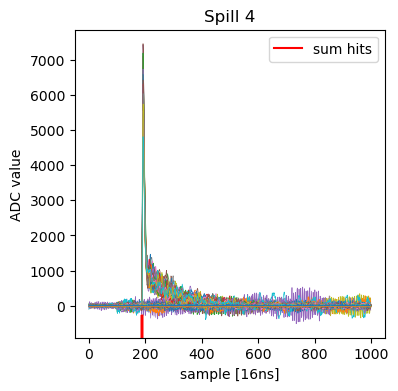

In [231]:
#Get assosciated light data
lev_id = spill #To be fixed: Only true for beam only simulation
lev_wvfm = dereference(lev_id,leventwvfmref,lwvfm)[0]["samples"]
lev_hits = dereference(lev_id,leventhitref,lhits)[0]

#Plot waveform
fig, ax = plt.subplots(1,figsize=(4,4))
for i,j in itertools.product(range(lev_wvfm[0].shape[0]),range(lev_wvfm[0].shape[1])):
    ax.plot(np.arange(1000),lev_wvfm[0][i,j,:],linewidth=0.5)
ax.set_ylim(*ax.get_ylim()) #Stupid matplot bug

#Plot hits
print("#Hits found: ",(~np.isnan(lev_hits["sample_idx"])).sum())
if np.any(lev_hits["sample_idx"]):
    hit_array = np.zeros((len(lev_hits),4))
    hit_array[:,0] = lev_hits["sample_idx"].ravel()
    hit_array[:,2] = lev_hits["sample_idx"].ravel()
    hit_array[:,1] = ax.get_ylim()[0]
    hit_array[:,3] = ymax=ax.get_ylim()[0]/3
    hit_plot = plt.plot(hit_array[:,::2].T, hit_array[:, 1::2].T,color="red")
    plt.legend([hit_plot[0]],['sum hits'],loc='best')

ax.set_title('Spill %d' %spill)
ax.set_xlabel("sample [16ns]")
ax.set_ylabel("ADC value")
spill+=1

### Hit structure
| Name              | Type             | Description                                                                                             |
| ----------------- | ---------------- | ------------------------------------------------------------------------------------------------------- |
| id                | u4,              | unique identifier                                                                                       |
| adc_id / tpc      | u1,              | tpc or adc index                                                                                        |
| chan / det        | u1,              | detector or channel index                                                                               |
| pos / boundary    | f4(3) / f4(3,2), | (x,y,z) center of sipm / ((xmin,xmax), (ymin,ymax), (zmin,zmax)) boundary of detector sensitive surface |
| sample_idx        | u2,              | sample index of peak within waveform                                                                    |
| ns                | f8,              | WR timestamp of waveform [ns]                                                                           |
| busy_ns           | f8,              | timestamp of peak relative to trigger [ns]                                                              |
| samples           | f4(2\*near+1,),  | sample value around peak (±near_samples)                                                                |
| sum               | f4,              | sum of sample values (out to ±near_samples)                                                             |
| max               | f4,              | peak value                                                                                              |
| sum_spline        | f4,              | integral of spline around peak (out to ±near_samples)                                                   |
| max_spline        | f4,              | maximum of spline around peak                                                                           |
| ns_spline         | f4,              | offset from center sample for maximum of spline [ns]                                                    |
| rising_spline     | f4,              | projection of spline to rising edge zero-crossing (offset from center sample) [ns]                      |
| rising_err_spline | f4,              | an estimate of the error on the rising edge zero-                                                       |
| fwhm_spline       | f4,              | spline FWHM [ns] 

# Charge Light combined plot

In [232]:
chits = f['/charge/calib_prompt_hits/data']
cevents = f['charge/events/data']
ceventchitref = f['charge/events/ref/charge/calib_prompt_hits']['ref']
ceventleventref = f['charge/events/ref/light/events']['ref']

In [233]:
spill = 4

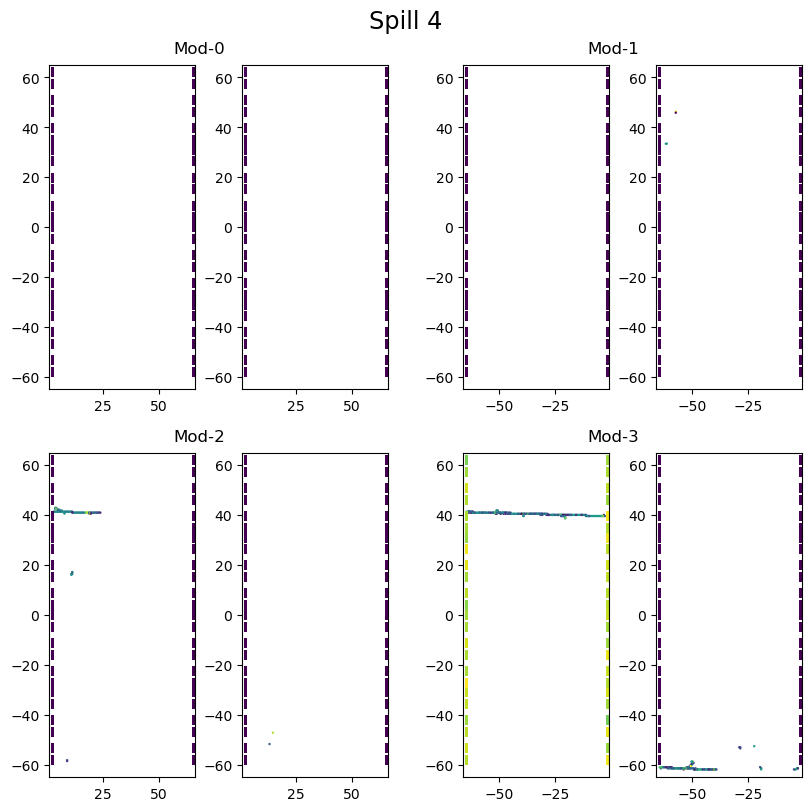

In [234]:
### Event display

#Get light data
lev_id = spill #To be fixed: Only true for beam only simulation
lev_wvfm = dereference(lev_id,leventwvfmref,lwvfm)[0]["samples"]
lev_hits = dereference(lev_id,leventhitref,lhits)[0]

#Get charge data
#cevent = dereference(lev_id,ceventleventref,cevents,ref_direction = (1,0),indices_only = True)[0]
cev_hits = dereference(3,ceventchitref,chits)

#Prepare plot
fig = plt.figure(layout='constrained', figsize=(8, 8))
fig.suptitle("Spill %d" % spill,fontsize='xx-large')
subfigs = fig.subfigures(2, 2, wspace=0.07)
ax=[]

#Prepare color map for light
cmap=plt.cm.viridis
norm = plt.Normalize(0,lev_wvfm[0].sum(axis=-1).max())
c = norm(lev_wvfm[0].sum(axis=-1))

#Define TPC borders
drift_length = 30.27225 # cm
drift_length = 35.27225 # cm
xbound=np.array([[0,drift_length],[-drift_length,0]])
ybound=np.array([-65.0,65.0])
zbound=np.array([-32.5,32.5])
mod_offsets = [
    [33.5, 0., 33.5],
    [33.5, 0., -33.5],
    [-33.5, 0., 33.5],
    [-33.5, 0., -33.5]]

for mod in range(4):
    subfigs[mod//2,mod%2].suptitle("Mod-%d"%mod)
    ax.append(subfigs[mod//2,mod%2].subplots(1,2))
    for itpc in range(2):
        ax[mod][itpc].set_xlim(*(mod_offsets[mod][2]+zbound))
        ax[mod][itpc].set_ylim(*(mod_offsets[mod][1]+ybound))
        
        #Plot charge
        c_xmask=np.logical_and(cev_hits["x"]>(mod_offsets[mod][0]+xbound[itpc][0]),cev_hits["x"]<(mod_offsets[mod][0]+xbound[itpc][1])) #select x region of tpc
        ax[mod][itpc].scatter(cev_hits[c_xmask]['z'],cev_hits[c_xmask]['y'],c=cev_hits[c_xmask]['Q'],s=0.5,cmap='viridis',norm=mlp.colors.LogNorm())
        
        #Plot light
        for i,j in itertools.product(range(lev_wvfm[0].shape[0]),range(lev_wvfm[0].shape[1])):
            pos=sipm_abs_pos[(i,j)][0]
            if pos[0]==-1:
                continue
            if np.logical_and(pos[0]>(mod_offsets[mod][0]+xbound[itpc][0]),pos[0]<(mod_offsets[mod][0]+xbound[itpc][1])):
                #print("IN")
                rect = mlp.patches.Rectangle(np.flip(pos[1:]), 1, 4,facecolor = cmap(c[i,j]))
                ax[mod][itpc].add_patch(rect)
